# Layer Explaination

In [1]:
import tensorflow as tf

## Input Image

input으로 들어갈 DataSet을 들여다보면서 시각화까지

패키지 모드
* os
* glob
* matplotlib

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from tensorflow.keras import datasets

(train_x, train_y), (test_x, test_y) = datasets.mnist.load_data()

In [4]:
image = train_x[0]

이미지를 열어봤으니 무엇을 확인해볼까요?

In [5]:
image.shape

(28, 28)

차원 수를 확인했는데, 어떤 결과가 나왔나요?

[batch size, height, width, channel]

<function matplotlib.pyplot.show(*args, **kw)>

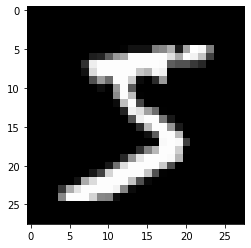

In [6]:
plt.imshow(image, 'gray')
plt.show

In [9]:
image = image[tf.newaxis, ..., tf.newaxis]
image.shape

(1, 28, 28, 1)

## Feature Extraction

여기서는 예측이 아니라 이미지의 특징들을 뽑아내는 과정이고  
예측은 Classficiation에서 일어난다.

### Convolution

filters : layer에서 나갈 때 몇 개의 fileter를 만들 것인지(a.k.a weights, filters, channels)  
kernel_size : filter(Weight)의 사이즈  
strides : 몇 개의 pixel을 skip 하면서 훑어지나갈 것인지(사이즈에도 영향을 줌)  
padding : zero padding을 만들것인지, VALID는 padding이 없고, SAME은 Padding이 있음(사이즈에도 영향을 줌)  
activation : Activation function을 만들것인지, 당장 설정 안해도 Layer층을 따로 만들 수 있음  

In [13]:
 tf.keras.layers.Conv2D(filters=3, kernel_size=(3, 3), strides=(1, 1), padding='SAME', activation='relu')

(3, 3) 대신에 3으로도 대체 가능

In [14]:
 tf.keras.layers.Conv2D(3, 3, 1,'SAME')

## Visualization

* tf.keras.layers.Conv2D

In [15]:
image = tf.cast(image, dtype=tf.float32)
image.dtype

tf.float32

In [20]:
layer = tf.keras.layers.Conv2D(5, 3, 1, padding='SAME')
layer

In [21]:
output = layer(image)

In [24]:
import numpy as np
np.min(image), np.max(image)

(0.0, 255.0)

In [25]:
np.min(output), np.max(output)

(-213.16545, 191.13484)

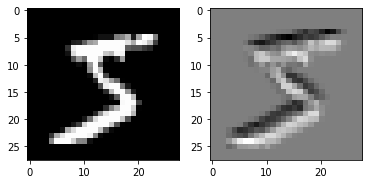

In [23]:
plt.subplot(1, 2, 1)
plt.imshow(image[0, :, :, 0], 'gray')
plt.subplot(1, 2, 2)
plt.imshow(output[0, :, :, 0], 'gray')
plt.show()

### weight 불러오기

* layer.get_weights()

In [26]:
weight = layer.get_weights()

In [27]:
weight[0].shape, weight[1].shape

((3, 3, 1, 5), (5,))

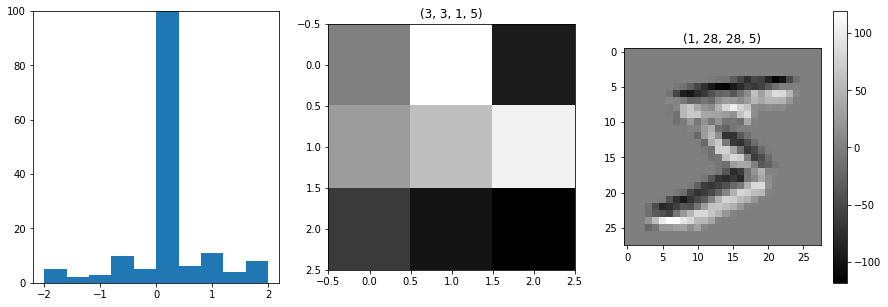

In [29]:
plt.figure(figsize=(15, 5))
plt.subplot(131)
plt.hist(output.numpy().ravel(), range=[-2, 2])
plt.ylim(0, 100)
plt.subplot(132)
plt.title(weight[0].shape)
plt.imshow(weight[0][:, :, 0, 0], 'gray')
plt.subplot(133)
plt.title(output.shape)
plt.imshow(output[0, :, :, 0], 'gray')
plt.colorbar()
plt.show()

## Activation function

In [30]:
import numpy as np

In [31]:
tf.keras.layers.ReLU()

In [32]:
act_layer = tf.keras.layers.ReLU()
act_output = act_layer(output)

In [33]:
output.shape

TensorShape([1, 28, 28, 5])

In [45]:
# act_output
np.min(act_output), np.max(act_output)

# 0 이하의 값들은 전부 0으로 대체된다.

(0.0, 191.13484)

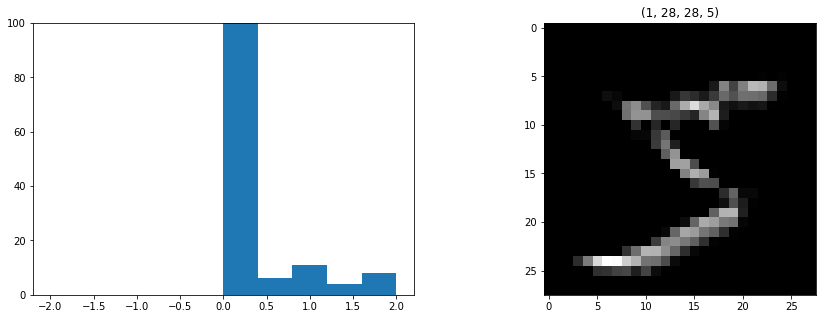

In [44]:
plt.figure(figsize=(15, 5))
plt.subplot(121)
plt.hist(act_output.numpy().ravel(), range=[-2, 2])
plt.ylim(0 ,100)

plt.subplot(122)
plt.title(act_output.shape)
plt.imshow(act_output[0, :, :, 0], 'gray')
plt.show()

## Pooling

ex, max pooling을 하면 특정 영역내의 가장 큰 값만 갖고온다.

In [46]:
tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides=(2, 2), padding='SAME')

In [47]:
pool_layer = tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides=(2, 2), padding='SAME')
pool_output = pool_layer(act_output)

In [49]:
act_output.shape

TensorShape([1, 28, 28, 5])

In [50]:
pool_output.shape

TensorShape([1, 14, 14, 5])

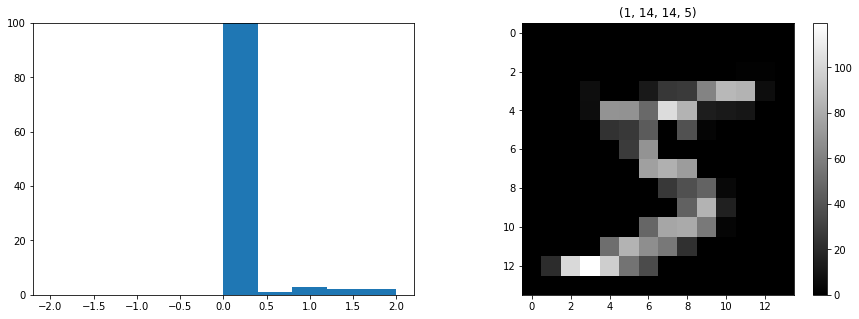

In [52]:
plt.figure(figsize=(15, 5))
plt.subplot(121)
plt.hist(pool_output.numpy().ravel(), range=[-2, 2])
plt.ylim(0 ,100)

plt.subplot(122)
plt.title(pool_output.shape)
plt.imshow(pool_output[0, :, :, 0], 'gray')
plt.colorbar()
plt.show()

## Fully Connected


y = w(weight)X + b(bias)

## Flatten
* tf.keras.layers.Flatten()

In [55]:
import tensorflow as tf

In [56]:
tf.keras.layers.Flatten()

In [57]:
flat_layer = tf.keras.layers.Flatten()

In [68]:
# flat_output = flat_layer(pool_output)
flat_output = flat_layer(output)

In [71]:
output.shape

TensorShape([1, 28, 28, 5])

In [72]:
flat_output.shape

TensorShape([1, 3920])

<function matplotlib.pyplot.show(*args, **kw)>

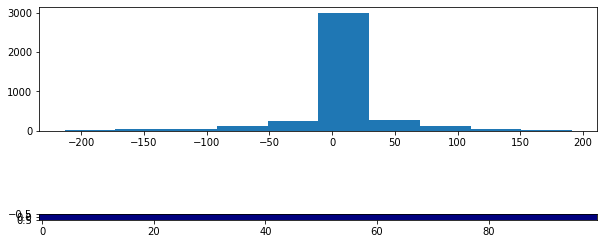

In [73]:
# 시각화
plt.figure(figsize=(10, 5))
plt.subplot(211)
plt.hist(flat_output.numpy().ravel())

plt.subplot(212)
plt.imshow(flat_output[:, :100], 'jet')
plt.show

## Dense

node를 하나씩 다 연결하겠단 의미

* tf.keras.layers.Dense

In [67]:
tf.keras.layers.Dense(32, activation='relu')

In [74]:
dens_layer = tf.keras.layers.Dense(32, activation="relu")

In [75]:
dens_output = layer(flat_output)

In [77]:
flat_output.shape

TensorShape([1, 3920])

In [78]:
dens_output.shape
# 32 개의 노드로 결과를 내보낸다.

TensorShape([1, 32])

In [79]:
# 32개의 노드에서 다시 10개의 노드로 내보내는 코드
dens_layer2 = tf.keras.layers.Dense(10, activation='relu')
output_example = dens_layer2(dens_output)

In [80]:
output_example.shape

TensorShape([1, 10])

## Drop out

학습 할 때마다 노드들을 끊고, 안끊고를 결정하는 것.  
학습 할 때만 노드를 랜덤하게 끊어주고 사용할때는 온전히 다 연결됨

* tf.keras.layers.Dropout

In [81]:
drop_layer = tf.keras.layers.Dropout(0.7)
drop_output = drop_layer(dens_output)

In [82]:
drop_output.shape

TensorShape([1, 32])

## Build Model

모델 시퀸스를 불러서 레이어를 하나 하나 추가해서 하나의 과정을 만드는 방법이 존재한다.

In [83]:
from tensorflow.keras import layers

In [84]:
input_shape = (28, 28, 1)
num_classes = 10  # class의 갯수

In [85]:
inputs = layers.Input(shape=input_shape)

# Feature Extraction
net = layers.Conv2D(32, 3, padding='SAME')(inputs)
net = layers.Activation('relu')(net)
net = layers.Conv2D(32, 3, padding='SAME')(net)
net = layers.Activation('relu')(net)
net = layers.MaxPool2D((2, 2))(net)
net = layers.Dropout(0.25)(net)


net = layers.Conv2D(64, 3, padding='SAME')(net)
net = layers.Activation('relu')(net)
net = layers.Conv2D(64, 3, padding='SAME')(net)
net = layers.Activation('relu')(net)
net = layers.MaxPool2D((2, 2))(net)
net = layers.Dropout(0.25)(net)

# Fully Connected
net = layers.Flatten()(net)
net = layers.Dense(512)(net)
net = layers.Activation('relu')(net)
net = layers.Dropout(0.25)(net)
net = layers.Dense(10)(net) # 마지막 Dense는 Classification 갯수와 동일하게
net = layers.Activation('softmax')(net)

model = tf.keras.Model(inputs=inputs, outputs=net, name='Basic_CNN')


In [86]:
model

In [87]:
model.summary()

Model: "Basic_CNN"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
activation (Activation)      (None, 28, 28, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
activation_1 (Activation)    (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 32)        0 